In [ ]:
# import nltk
# nltk.download('punkt')


In [ ]:
# nltk.download('stopwords')


In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Cargar datos 
archivo_excel = 'DatosProcesados.xlsx'
data = pd.read_excel(archivo_excel)
data

,Index,Autor,Texto,Fecha de creacion,Hashtags
0,0,CarlosAnax,"""RT @HablemosdePolt4: La peor delincuencia no ...",2022-11-15 03:50:24+00:00,[]
1,1,Noticias_Sonaa,"""RT @ProtegeryServir: La PolicÃ­a Nacional, re...",2022-11-15 03:50:23+00:00,[]
2,2,martinsincelejo,"""RT @GustavoBolivar: Ayer en Villavicencio, mi...",2022-11-15 03:50:21+00:00,[]
3,3,braugahi,"""... Cuando va a colocar una unidad movil de m...",2022-11-15 03:50:19+00:00,[]
4,4,JLGarca4,RT @yasnalewin: Tal vez no sea buena idea deja...,2022-11-15 03:50:18+00:00,[]
...,...,...,...,...,...
994,989,DominiqueBaq,"""RT @jmerchanhaz: Que los violentos no se conf...",2022-11-15 02:56:55+00:00,[]
995,990,Kmmcanyonmoon1,@lamissme @beau_chile @PaulaChic @MuDesamparad...,2022-11-15 02:56:52+00:00,[]
996,991,cz61_s1MaryLeo,RT @aurribarri9: ReuniÃ³n de Seguridad Ciudada...,2022-11-15 02:56:49+00:00,[]
997,992,FABIANF150176,"""RT @GustavoBolivar: Ayer en Villavicencio, mi...",2022-11-15 02:56:44+00:00,[]


In [2]:

# Función para limpiar el texto
def limpiar_texto(texto):
    texto = texto.lower()  # Convertir a minúsculas
    texto = re.sub(r'http\S+', '', texto)  # Eliminar URLs
    texto = re.sub(r'@\w+', '', texto)  # Eliminar menciones
    texto = re.sub(r'[^a-záéíóúñ]', ' ', texto)  # Conservar solo letras y caracteres españoles
    texto = re.sub(r'\s+', ' ', texto)  # Eliminar espacios extra
    return texto.strip()

# Aplicar la limpieza



In [3]:
data['Texto'] = data['Texto'].fillna('')

data['Texto'] = data['Texto'].apply(limpiar_texto)

In [4]:
from collections import Counter

# Unir todo el texto en una sola cadena
texto_total = ' '.join(data['Texto'])

# Tokenizar el texto
tokens = word_tokenize(texto_total)

# Eliminar stopwords
palabras_importantes = [palabra for palabra in tokens if palabra not in stopwords.words('spanish')]

# Contar frecuencia de palabras
frecuencia_palabras = Counter(palabras_importantes)


In [5]:
from textblob import TextBlob
from googletrans import Translator

translator = Translator()

# Función para analizar sentimientos
def analizar_sentimiento(texto):
    try:
        texto_en = translator.translate(texto, dest='en').text
        return TextBlob(texto_en).sentiment.polarity
    except Exception as e:
        return None

data['Sentimiento'] = data['Texto'].apply(analizar_sentimiento)


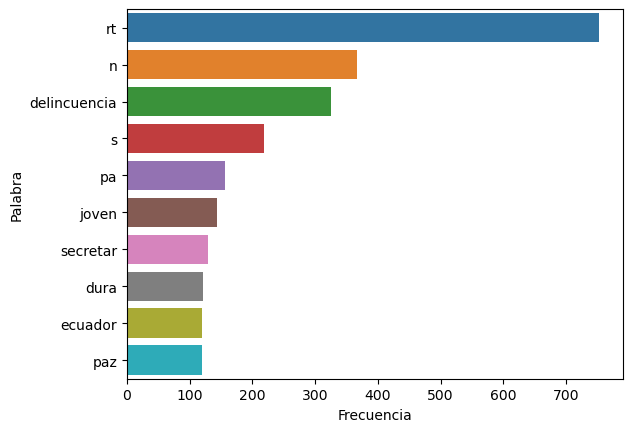

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ejemplo: Gráfico de barras para las 10 palabras más comunes
palabras_comunes = pd.DataFrame(frecuencia_palabras.most_common(10), columns=['Palabra', 'Frecuencia'])
sns.barplot(x='Frecuencia', y='Palabra', data=palabras_comunes)
plt.show()


In [7]:
print(data['Sentimiento'])

0      None
1      None
2      None
3      None
4      None
       ... 
994    None
995    None
996    None
997    None
998    None
Name: Sentimiento, Length: 999, dtype: object
